In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# NASDAQ 100 Index; Index; D; NSA; 2019-01-10 => Daily - not seasonally adjusted 
tr_path = '/Users/Stellarhardwood/Downloads/STOCKMARKET_csv_2/STOCKMARKET_csv_2/data/NASDAQ100.csv'
df_nas = pd.read_csv(tr_path)

# Dow Jones Composite Average; Index; D; NSA; 2019-01-10
path = '/Users/Stellarhardwood/Downloads/STOCKMARKET_csv_2/STOCKMARKET_csv_2/data/DJCA.csv'
df_dow = pd.read_csv(path)

wtr = pd.read_csv('/Users/Stellarhardwood/Downloads/weather-data-in-new-york-city-2016/data.csv')

In [381]:
df_nas.describe()
df_nas['VALUE'].head(50).values

nas_vals = pd.Series(df_nas["VALUE"].values)
nas_dates = pd.Series(df_nas["DATE"].values)
nas_new = pd.to_numeric(nas_vals,errors='coerce')

df_nas2 = pd.DataFrame(nas_new, columns =['values'])
df_dates = pd.DataFrame(nas_dates,columns=['dates'])
df1 = df_nas2.dropna()
df_nasdaq = pd.concat([df_dates,df_nas2],axis=1).dropna()
df_nasdaq.describe()

,values
count,8325.000000
mean,1855.339977
std,1703.431156
min,128.430000
25%,386.020000
50%,1482.340000
75%,2464.620000
max,7660.180000


In [382]:
df_dow.describe()
df_dow['VALUE'].head(26).values
# noticing theres values with '.'
# need to clean this up 

array(['2976.17', '2948.09', '2856.88', '2876.05', '2895.41', '.',
       '2775.04', '2857.44', '2830.25', '2805.81', '2829.37', '2856.59',
       '2927.47', '2858.60', '2798.52', '2776.47', '2839.01', '2814.37',
       '2853.37', '2935.88', '2927.73', '2800.19', '2798.48', '2787.05',
       '2762.98', '.'], dtype=object)

In [383]:
s = pd.Series(df_dow["VALUE"].values)
d = pd.Series(df_dow['DATE'].values)
# Make strings float 
s_new = pd.to_numeric(s,errors='coerce')
# Create dframe
df_s = pd.DataFrame(s_new, columns=['value'])
# Drop misc values 
dfs = df_s.dropna()
# Create dframe for dates 
dfd = pd.DataFrame(d,columns=['dates'])
new = pd.concat([dfd,dfs],axis=1)
df_dows = new.dropna()
df_dows # 2515 rows × 2 columns
df_dows.describe()

,value
count,2515.000000
mean,5470.974823
std,1631.360867
min,2195.300000
25%,4147.435000
50%,5510.540000
75%,6428.625000
max,8909.810000


In [384]:
# data only avialable from 1-1-2016 to 12-1-2016 
# need to trim stock data 
df_wtr = pd.DataFrame(wtr)
df_wtr['average temperature'].describe()


count    366.000000
mean      57.215847
std       17.124760
min        7.000000
25%       44.000000
50%       55.750000
75%       73.500000
max       88.500000
Name: average temperature, dtype: float64

Text(0, 0.5, 'Date')

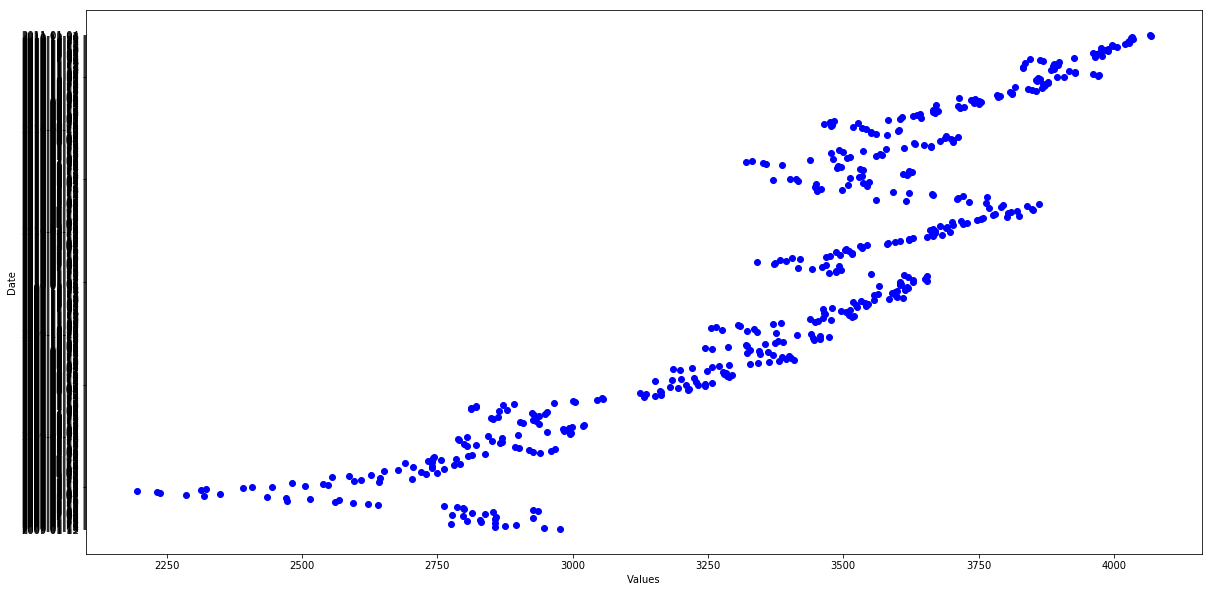

In [385]:
# Dow jones 
y= df_dows['dates'].head(500)
x= df_dows['value'].head(500)


plt.plot(x,y, 'bo')
#Add axis labels 
plt.xlabel("Values")
plt.ylabel("Date")



Text(0, 0.5, 'Date')

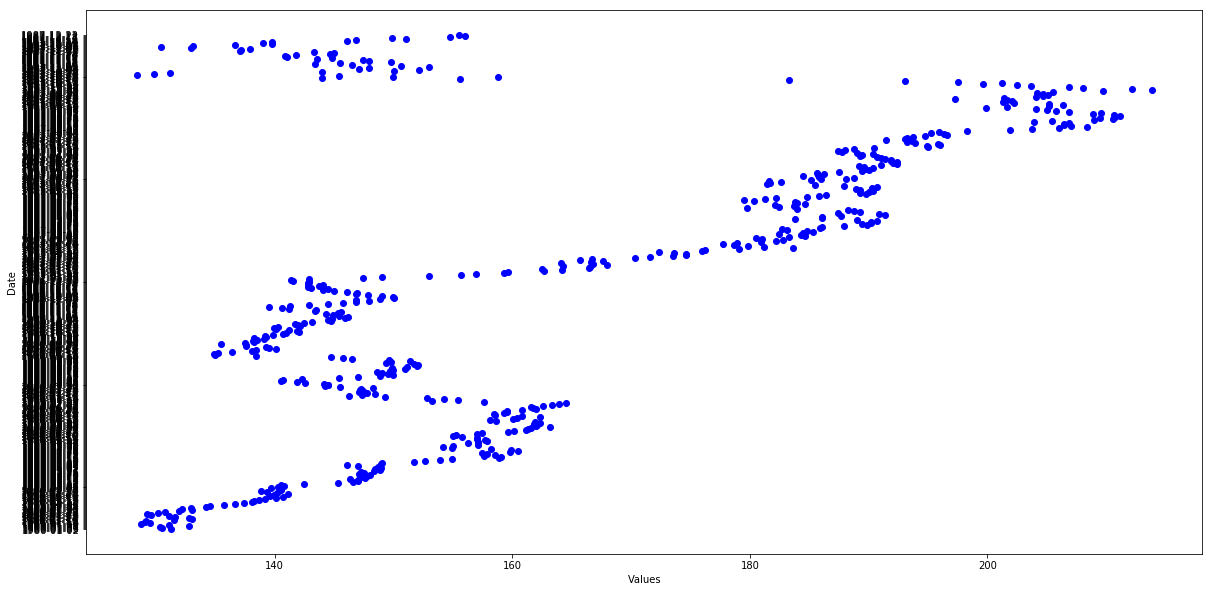

In [386]:
# NASDAQ 

y1= df_nasdaq['dates'].head(500)
x1= df_nasdaq['values'].head(500)


plt.plot(x1,y1, 'bo')
#Add axis labels 
plt.xlabel("Values")
plt.ylabel("Date")

In [388]:
# locate data that has 2016 
dows_2016 = df_dows[df_dows['dates'].str.match("2016")]
nasdaq_2016 = df_nasdaq[df_nasdaq['dates'].str.match("2016")]
dows_2016.describe() # 252 rows × 2 columns

,value
count,252.000000
mean,6289.604841
std,332.567478
min,5466.870000
25%,6193.617500
50%,6322.210000
75%,6458.240000
max,7003.260000


In [389]:
nasdaq_2016.describe()

,values
count,252.000000
mean,4569.431429
std,254.475745
min,3947.800000
25%,4364.552500
50%,4543.470000
75%,4805.485000
max,4965.810000


Text(0, 0.5, 'Values')

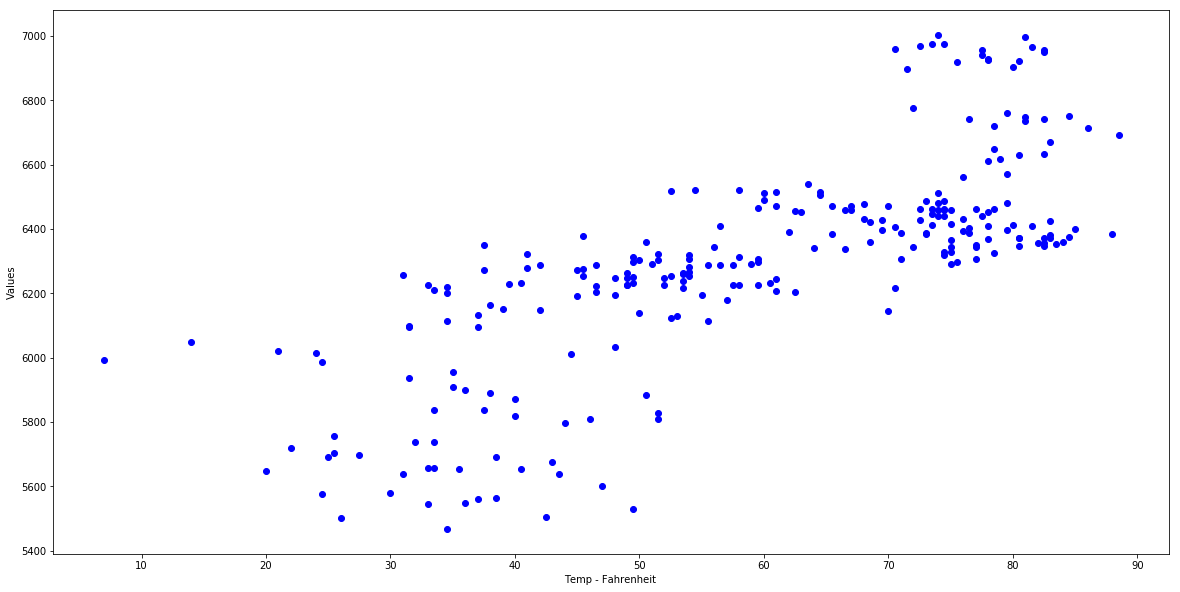

In [411]:
# Dow Jones - 2016 with weather from 2016 
x1= df_wtr['average temperature'].iloc[:252]
y1= dows_2016['value']

linear_regressor = LinearRegression()
plt.plot(x1,y1, 'bo')
#Add axis labels 
plt.xlabel("Temp - Fahrenheit ")
plt.ylabel("Values")



Text(0, 0.5, 'Values')

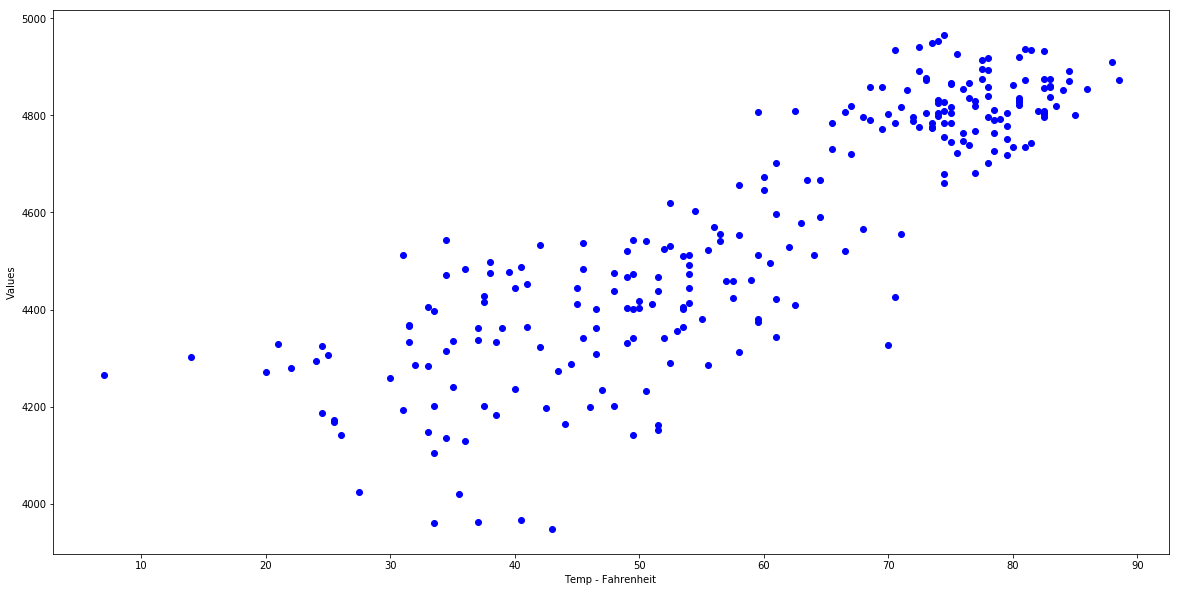

In [410]:
# NASDAQ - 2016 with weather from 2016 
x1= df_wtr['average temperature'].iloc[:252]
y1= nasdaq_2016['values']


plt.plot(x1,y1, 'bo')
#Add axis labels 
plt.xlabel("Temp - Fahrenheit ")
plt.ylabel("Values")


In [413]:
##### DOW-JONES #####
# CREATING A NEW DATAFRAME FOR WEATHER AND 
# In order to perform linear regression 
a = pd.DataFrame(df_wtr['average temperature'].iloc[:252])
b = pd.DataFrame(dows_2016['value'])
tst = b.reset_index()
b_new = tst.drop(['index'],axis=1)
c = pd.concat([a,b_new],axis=1)
c.describe()

,average temperature,value
count,252.000000,252.000000
mean,59.057540,6289.604841
std,18.280725,332.567478
min,7.000000,5466.870000
25%,45.375000,6193.617500
50%,60.000000,6322.210000
75%,75.000000,6458.240000
max,88.500000,7003.260000


Text(0, 0.5, 'Values')

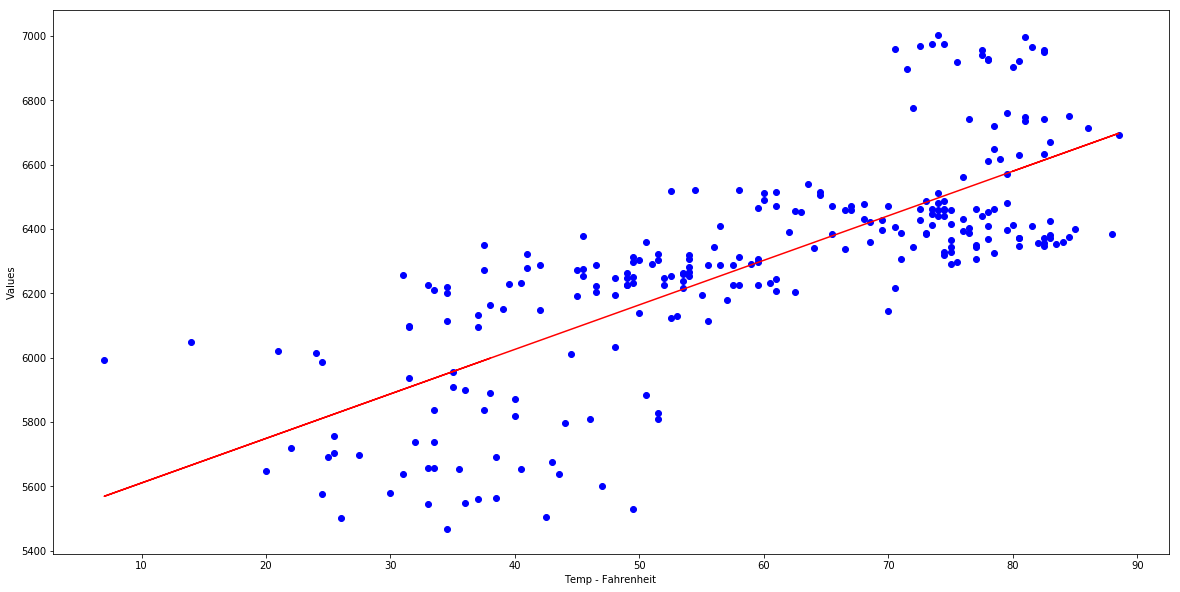

In [422]:
# Dow -Jones Linear regression 
linear_regressor = LinearRegression() 
linear_regressor.fit(a,b_new)
Y_pred = linear_regressor.predict(a)
plt.plot(a,b_new, 'bo')
plt.plot(a,Y_pred, color='red')
plt.xlabel("Temp - Fahrenheit ")
plt.ylabel("Values")


In [420]:
linear_regressor.score(a,b_new)

0.5793594481502754

In [377]:
#### NASDAQ ####
# CREATING A NEW DATAFRAME FOR WEATHER AND 
a1 = pd.DataFrame(df_wtr['average temperature'].iloc[:252])
b1 = pd.DataFrame(nasdaq_2016['values'])
test = b1.reset_index()

b1_new = test.drop(['index'],axis=1)
c1 = pd.concat([a1,b1_new],axis=1)
c1.describe()

,average temperature,values
count,252.000000,252.000000
mean,59.057540,4569.431429
std,18.280725,254.475745
min,7.000000,3947.800000
25%,45.375000,4364.552500
50%,60.000000,4543.470000
75%,75.000000,4805.485000
max,88.500000,4965.810000
